In [848]:
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [849]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [850]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [851]:
test.sample(5)
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
265,1157,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S


In [852]:
test.dtypes
test.count()

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [853]:
train.dtypes
train.count()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [854]:
import seaborn as sns

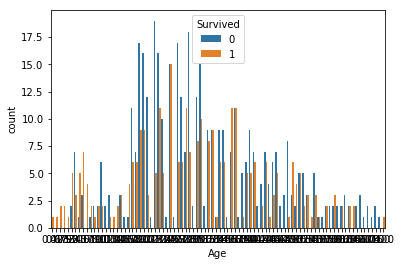

In [855]:
sns.countplot(data=train,x='Age', hue='Survived')

In [856]:
# Test for MCAR vs MAR
# MCAR = Missing Completely At Random
nan_val = train[train['Age'].isna() == True]['Survived']
nonan_val = train[train['Age'].isna() == False]['Survived']
ttest_ind(nan_val, nonan_val)

Ttest_indResult(statistic=-2.7606993230995345, pvalue=0.005886534840075563)

The ttest indicates that we should remove the Age values. LOOK BACK HERE IF THIS APPROACH ENDS UP BEING WORSE. THIS CAN NOT WORK. UPDATE: Didn't work, had to take in all values for practical reasons.

In [857]:
total = pd.concat([train, test])

In [858]:
total.head()
total.count()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

In [859]:
total.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [860]:
total.count()

Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

We impute mean age. DOESN'T MAKE TERRIBLE SENSE, BUT WELL.

In [861]:
#total.Age.fillna(total.Age.mean(), inplace=True)

In [862]:
total.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [863]:
total[total.index == 27]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
27,19.0,C23 C25 C27,S,263.000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
27,22.5,NaN,C,7.225,"Daher, Mr. Shedid",0,919,3,male,0,NaN,2698


Some people have multiple cabins in their name, and hence the fare is higher. CAN WORK ON THIS.

In [864]:
total['Cabin'] = total['Cabin'].fillna('Unknown')

In [865]:
total['Embarked'] = total.Embarked.fillna('C')
total['Fare'] = total.Fare.fillna(total.Fare.mean())

In [866]:
total['Salutation'] = total.Name.str.extract('^[A-Za-z.\- \']+, (\w+). [/a-zA-Z\(\) \'\".-]+$')

d:\desk\ml\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [867]:
total[total.Salutation.isna() == True]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation


In [868]:
total[total.index == 397]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation
397,46.0,Unknown,S,26.0,"McKane, Mr. Peter David",0,398,2,male,0,0.0,28403,Mr
397,48.0,B41,C,79.2,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",1,1289,1,female,1,NaN,13567,Mrs


In [869]:
total.count()

Age            1046
Cabin          1309
Embarked       1309
Fare           1309
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
Salutation     1309
dtype: int64

In [870]:
total.Salutation.replace(['Capt','Col','Major','Dr','Jonkheer','Rev','Sir'],'Honorable',inplace=True)
total.Salutation.replace(['Don','th'],'Mr',inplace=True)
total.Salutation.replace(['Dona','Lady','Mme',],'Mrs',inplace=True)
total.Salutation.replace(['Ms','Mlle'],'Miss',inplace=True)

In [871]:
total.groupby('Salutation').count()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
Salutation,,,,,,,,,,,,
Honorable,24,25,25,25,25,25,25,25,25,25,20,25
Master,53,61,61,61,61,61,61,61,61,61,40,61
Miss,213,264,264,264,264,264,264,264,264,264,185,264
Mr,583,759,759,759,759,759,759,759,759,759,519,759
Mrs,173,200,200,200,200,200,200,200,200,200,127,200


In [872]:
total = total.reset_index()

In [873]:
def avgAge(g):
    g.Age.fillna(g.Age.mean(), inplace=True)
    #print(g.head())
    return g

total_new = total.groupby('Salutation').apply(avgAge)

In [874]:
total = total_new

In [875]:
total['Family Size'] = total['Parch'] + total['SibSp'] + 1
total.sample(10)

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation,Family Size
1149,258,19.000000,Unknown,S,13.0000,"Bentham, Miss. Lilian W",0,1150,2,female,0,NaN,28404,Miss,1
788,788,1.000000,Unknown,S,20.5750,"Dean, Master. Bertram Vere",2,789,3,male,1,1.0,C.A. 2315,Master,4
231,231,29.000000,Unknown,S,7.7750,"Larsson, Mr. Bengt Edvin",0,232,3,male,0,0.0,347067,Mr,1
431,431,36.994220,Unknown,S,16.1000,"Thorneycroft, Mrs. Percival (Florence Kate White)",0,432,3,female,1,1.0,376564,Mrs,2
1010,119,29.000000,Unknown,S,26.0000,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",0,1011,2,female,1,NaN,SC/AH 29037,Mrs,2
772,772,57.000000,E77,S,10.5000,"Mack, Mrs. (Mary)",0,773,2,female,0,0.0,S.O./P.P. 3,Mrs,1
1237,346,26.000000,Unknown,S,13.0000,"Botsford, Mr. William Hull",0,1238,2,male,0,NaN,237670,Mr,1
1165,274,32.266724,Unknown,C,7.2250,"Saade, Mr. Jean Nassr",0,1166,3,male,0,NaN,2676,Mr,1
1229,338,25.000000,Unknown,S,31.5000,"Denbury, Mr. Herbert",0,1230,2,male,0,NaN,C.A. 31029,Mr,1
689,689,15.000000,B5,S,211.3375,"Madill, Miss. Georgette Alexandra",1,690,1,female,0,1.0,24160,Miss,2


Can investigate relationships among people through tickets. TRY LATER.

In [876]:
total_copy = total.copy()

In [877]:
ticket_db = total.merge(total_copy, left_on = 'Ticket', right_on='Ticket', how='inner')[['Ticket', 'Name_x','Name_y','Parch_x','Parch_y','SibSp_x','SibSp_y']]

In [878]:
ticket_db = ticket_db[(ticket_db['Name_x'] != ticket_db['Name_y']) & (ticket_db['Parch_x'] == 0)
         & (ticket_db['Parch_y'] == 0) & (ticket_db['SibSp_x'] == 0) & (ticket_db['SibSp_y'] == 0)]

In [879]:
acq_data = pd.DataFrame(ticket_db.groupby('Name_x').count()['Ticket'])

In [880]:
total = total.merge(acq_data, how='left', left_on='Name',right_index=True)

In [881]:
total.rename(columns={'Ticket_y':'Ticketers',
                     'Ticket_x':'Ticket'},inplace=True)
total.Ticketers.fillna(0,inplace=True)

In [882]:
# total.replace({'Sex':{'male':0, 'female':1},
#                'Salutation':{'Mr':0, 'Mrs':1, 'Master':2, 'Miss':3, 'Honorable':4}}, inplace=True)

In [883]:
total['Age Groups'] = pd.cut(total['Age'], [0,5,15,25,50,200], labels=[0,1,2,3,4])

In [884]:
total[total.Cabin.str.match('.\d{1,2} .\d{1,2} .\d{1,2}')]
total[total['Pclass'] == 1].sample(10)

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation,Family Size,Ticketers,Age Groups
27,27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,Mr,6,0.0,2
88,88,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950,Miss,6,0.0,2
311,311,18.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608,Miss,5,0.0,2
341,341,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950,Miss,6,0.0,2
438,438,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950,Mr,6,0.0,4
679,679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,Mr,2,0.0,3
742,742,21.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,743,1,female,2,1.0,PC 17608,Miss,5,0.0,2
872,872,33.0,B51 B53 B55,S,5.0000,"Carlsson, Mr. Frans Olof",0,873,1,male,0,0.0,695,Mr,1,0.0,3
915,24,48.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",3,916,1,female,1,NaN,PC 17608,Mrs,5,0.0,3
944,53,28.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Ethel Flora",2,945,1,female,3,NaN,19950,Miss,6,0.0,3


,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation,Family Size,Ticketers,Age Groups
991,100,43.000000,C116,C,55.4417,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",0,992,1,female,1,NaN,11778,Mrs,2,0.0,3
30,30,40.000000,Unknown,C,27.7208,"Uruchurtu, Don. Manuel E",0,31,1,male,0,0.0,PC 17601,Mr,1,0.0,3
467,467,56.000000,Unknown,S,26.5500,"Smart, Mr. John Montgomery",0,468,1,male,0,0.0,113792,Mr,1,0.0,4
815,815,32.266724,B102,S,0.0000,"Fry, Mr. Richard",0,816,1,male,0,0.0,112058,Mr,1,1.0,3
913,22,36.994220,Unknown,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,914,1,female,0,NaN,PC 17598,Mrs,1,0.0,3
1178,287,24.000000,B45,S,82.2667,"Snyder, Mr. John Pillsbury",0,1179,1,male,1,NaN,21228,Mr,2,0.0,2
835,835,39.000000,E49,C,83.1583,"Compton, Miss. Sara Rebecca",1,836,1,female,1,1.0,PC 17756,Miss,3,0.0,3
452,452,30.000000,C111,C,27.7500,"Foreman, Mr. Benjamin Laventall",0,453,1,male,0,0.0,113051,Mr,1,0.0,3
310,310,24.000000,C54,C,83.1583,"Hays, Miss. Margaret Bechstein",0,311,1,female,0,1.0,11767,Miss,1,0.0,2
168,168,32.266724,Unknown,S,25.9250,"Baumann, Mr. John D",0,169,1,male,0,0.0,PC 17318,Mr,1,0.0,3


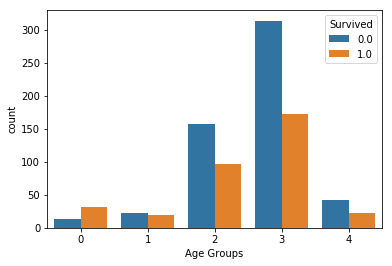

In [885]:
sns.countplot(data=total[:891],x='Age Groups', hue='Survived')

In [886]:
# total['Family Size'] = total['Family Size'] + total['Ticketers']

EXPERIMENT: Family size should have acquintances or not. Also, include Parch, SibSp vs don't with Family Size.
Doing: acq, don't include is better.

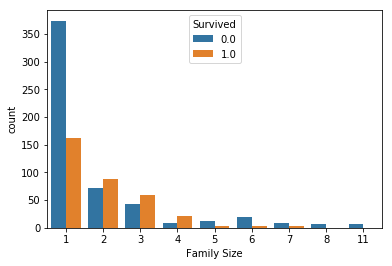

In [887]:
sns.countplot(data=total, x='Family Size',hue='Survived')

In [888]:
total['Family Groups'] = pd.cut(total['Family Size'],[0,1,4,12], labels=['Single','Small','Large'])

In [889]:
total[total.Embarked == 'Unknown']

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Salutation,Family Size,Ticketers,Age Groups,Family Groups


In [890]:
total.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [891]:
total[(total.Embarked == 'C') & (total['Pclass'] == 1)].median()

index          311.0000
Age             37.0000
Fare            78.2667
Parch            0.0000
PassengerId    699.0000
Pclass           1.0000
SibSp            0.0000
Survived         1.0000
Family Size      2.0000
Ticketers        0.0000
Age Groups       3.0000
dtype: float64

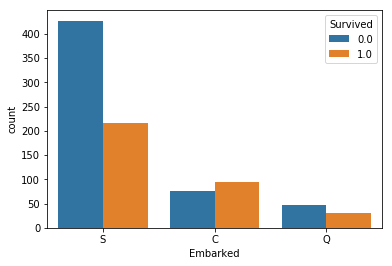

In [892]:
sns.countplot(data=total, x='Embarked', hue='Survived')

In [893]:
total_orig = total

In [894]:
total = pd.get_dummies(total, columns=['Pclass','Sex','Age Groups','Salutation','Family Groups','Embarked'])

In [895]:
total.columns

Index(['index', 'Age', 'Cabin', 'Fare', 'Name', 'Parch', 'PassengerId',
       'SibSp', 'Survived', 'Ticket', 'Family Size', 'Ticketers', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age Groups_0',
       'Age Groups_1', 'Age Groups_2', 'Age Groups_3', 'Age Groups_4',
       'Salutation_Honorable', 'Salutation_Master', 'Salutation_Miss',
       'Salutation_Mr', 'Salutation_Mrs', 'Family Groups_Single',
       'Family Groups_Small', 'Family Groups_Large', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [896]:
from sklearn.preprocessing import RobustScaler
COLUMNS_SCALE = ['Age','Fare']

In [897]:
# scaler = RobustScaler()
# scaled = pd.DataFrame(scaler.fit_transform(total[COLUMNS_SCALE]), columns=COLUMNS_SCALE)

In [898]:
# for col in COLUMNS_SCALE:
#     total[col] = scaled[col]

In [899]:
total[total.index == 891]

,index,Age,Cabin,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,...,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Family Groups_Single,Family Groups_Small,Family Groups_Large,Embarked_C,Embarked_Q,Embarked_S
891,0,34.5,Unknown,7.8292,"Kelly, Mr. James",0,892,0,NaN,330911,...,0,0,1,0,1,0,0,0,1,0


In [900]:
train_dat = total[:891]
test_dat = total[891:]

In [901]:
# train_new = total_orig[:891]
# test_new = total_orig[891:]

In [902]:
train_dat.shape[0]== train.shape[0]
test_dat.shape[0]== test.shape[0]

True

True

In [903]:
from sklearn.ensemble import RandomForestClassifier

In [904]:
train_dat.columns

Index(['index', 'Age', 'Cabin', 'Fare', 'Name', 'Parch', 'PassengerId',
       'SibSp', 'Survived', 'Ticket', 'Family Size', 'Ticketers', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age Groups_0',
       'Age Groups_1', 'Age Groups_2', 'Age Groups_3', 'Age Groups_4',
       'Salutation_Honorable', 'Salutation_Master', 'Salutation_Miss',
       'Salutation_Mr', 'Salutation_Mrs', 'Family Groups_Single',
       'Family Groups_Small', 'Family Groups_Large', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [906]:
FEED_FEATURES = ['Pclass_1', 'Pclass_2',
       'Pclass_3','Sex_female', 'Age Groups_0', 'Age Groups_1',
       'Age Groups_2', 'Age Groups_3', 'Age Groups_4', 'Salutation_Honorable',
       'Salutation_Master', 'Salutation_Miss', 'Salutation_Mr', 'Salutation_Mrs',
        'Family Groups_Single', 'Family Groups_Small', 'Family Groups_Large',
        'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [907]:
for feat in FEED_FEATURES:
    print(feat, total[feat].corr(total['Survived']))

Pclass_1 0.28590376778374244
Pclass_2 0.09334857241192901
Pclass_3 -0.3223083573729705
Sex_female 0.543351380657755
Age Groups_0 0.1503043836002723
Age Groups_1 0.03763459346368635
Age Groups_2 -0.0025301879887872814
Age Groups_3 -0.06741555745780133
Age Groups_4 -0.022931594790851988
Salutation_Honorable -0.0261232554281554
Salutation_Master 0.08522056083929423
Salutation_Miss 0.3356355207687265
Salutation_Mr -0.5485242792529136
Salutation_Mrs 0.34493496748628755
Family Groups_Single -0.2033670856998921
Family Groups_Small 0.2798545470332842
Family Groups_Large -0.12514712398530717
Embarked_C 0.174717533563979
Embarked_Q 0.003650382683972067
Embarked_S -0.15566027340439326


In [908]:
clf = RandomForestClassifier()

In [909]:
clf.fit(train_dat[FEED_FEATURES],train_dat['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [910]:
clf.feature_importances_

array([0.05387805, 0.02507698, 0.07334917, 0.27602735, 0.02524998,
       0.00750013, 0.02711255, 0.03103935, 0.01652252, 0.00903219,
       0.0064277 , 0.00992965, 0.21401555, 0.03063151, 0.02918257,
       0.06663688, 0.04318279, 0.01770264, 0.01432264, 0.02317981])

In [911]:
predictions = clf.predict(test_dat[FEED_FEATURES])

In [912]:
predictions = predictions.astype(int)

In [913]:
pd.DataFrame({'PassengerId':test_dat['PassengerId'],
              'Survived':predictions}).to_csv('predict6.csv',index=False)

In [652]:
# from sklearn.naive_bayes import GaussianNB

In [62]:
# clf = GaussianNB()
# clf.fit(train_dat[FEED_FEATURES],train_dat['Survived'])
# predictions = clf.predict(test_dat[FEED_FEATURES])
# predictions = predictions.astype(int)
# pd.DataFrame({'PassengerId':test_dat['PassengerId'],
#               'Survived':predictions}).to_csv('predict2.csv',index=False)

GaussianNB(priors=None)

In [68]:
train_dat

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,...,Age Groups_0,Age Groups_1,Age Groups_2,Age Groups_3,Age Groups_4,Salutation_0,Salutation_1,Salutation_2,Salutation_3,Salutation_4
0,-0.606241,Unknown,S,-0.308146,"Braund, Mr. Owen Harris",0,1,1,0.0,A/5 21171,...,0,0,1,0,0,1,0,0,0,0
1,0.624528,C85,C,2.430755,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1.0,PC 17599,...,0,0,0,1,0,0,1,0,0,0
2,-0.298549,Unknown,S,-0.279274,"Heikkinen, Miss. Laina",0,3,0,1.0,STON/O2. 3101282,...,0,0,1,0,0,0,0,0,1,0
3,0.393759,C123,S,1.652999,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1.0,113803,...,0,0,0,1,0,0,1,0,0,0
4,0.393759,Unknown,S,-0.273927,"Allen, Mr. William Henry",0,5,0,0.0,373450,...,0,0,0,1,0,1,0,0,0,0
5,0.000000,Unknown,Q,-0.256463,"Moran, Mr. James",0,6,0,0.0,330877,...,0,0,1,0,0,1,0,0,0,0
6,1.855297,E46,S,1.600068,"McCarthy, Mr. Timothy J",0,7,0,0.0,17463,...,0,0,0,1,0,1,0,0,0,0
7,-2.144703,Unknown,S,0.283192,"Palsson, Master. Gosta Leonard",1,8,3,0.0,349909,...,1,0,0,0,0,0,0,1,0,0
8,-0.221626,Unknown,S,-0.142045,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1.0,347742,...,0,0,1,0,0,0,1,0,0,0
9,-1.221626,Unknown,C,0.667970,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,1.0,237736,...,0,1,0,0,0,0,1,0,0,0


In [69]:
# from sklearn.neural_network import MLPClassifier

In [72]:
# clf = MLPClassifier(solver='lbfgs')
# clf.fit(train_dat[FEED_FEATURES],train_dat['Survived'])
# predictions = clf.predict(test_dat[FEED_FEATURES])
# predictions = predictions.astype(int)
# pd.DataFrame({'PassengerId':test_dat['PassengerId'],
#               'Survived':predictions}).to_csv('predict3.csv',index=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)